<a href="https://colab.research.google.com/github/CaptainVivi/Music-Artists-Collaboration-Network---a-Social-Network-Analysis/blob/main/Music_Artists_Collaboration_Network_SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import kagglehub

# Download the dataset
jfreyberg_spotify_artist_feature_collaboration_network_path = kagglehub.dataset_download('jfreyberg/spotify-artist-feature-collaboration-network')

# Print download path
print(jfreyberg_spotify_artist_feature_collaboration_network_path)

/root/.cache/kagglehub/datasets/jfreyberg/spotify-artist-feature-collaboration-network/versions/2


In [ ]:
import kagglehub
import pandas as pd
import os

# Download the dataset
dataset_path = kagglehub.dataset_download('jfreyberg/spotify-artist-feature-collaboration-network')

# Define paths for nodes.csv and edges.csv, assuming they are at the top level of the downloaded dataset
nodes_path = os.path.join(dataset_path, 'nodes.csv')
edges_path = os.path.join(dataset_path, 'edges.csv')

# Load nodes.csv and edges.csv into DataFrame
nodes = pd.read_csv(nodes_path)
edges = pd.read_csv(edges_path)

In [ ]:
nodes.head()

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']


In [ ]:
edges.head()

,id_0,id_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0


In [ ]:
# Filter nodes DataFrame based on whether "k-pop" is in "genres" column
df_nodes = nodes[nodes['genres'].apply(lambda x: 'k-pop' in x)]
df_nodes.head()

,spotify_id,name,followers,popularity,genres,chart_hits
56,6Xg22wJOAcnvPUfk5WvODH,JEON SOYEON,626827.0,56,['k-pop'],['kr (1)']
124,55tJwpPIz9BMrSLM45iEXX,9MUSES,58.0,38,"['k-pop', 'k-pop girl group']",NaN
156,3wYcmejLVtOoHIq9szUugh,Kaho Hung,24853.0,53,"['cantopop', 'hk-pop']",['hk (11)']
180,5snNHNlYT2UrtZo5HCJkiw,Epik High,630279.0,56,"['k-pop', 'k-rap', 'korean old school hip hop'...","['hk (2)', 'id (1)', 'my (5)', 'sg (3)', 'kr (..."
189,2FgZrgTMX6Sk0VNcOsEPmm,Punch,262950.0,62,"['k-pop', 'korean pop']",['tw (1)']


In [ ]:
# Extract spotify_ids and names into lists
kpop_ids = list(df_nodes['spotify_id'])
kpop_names = list(df_nodes['name'])

In [ ]:
# Filtering EdgeList DataFrame to include only edges between k-pop artists
df_edges = edges[edges['id_0'].isin(kpop_ids)]
df_edges = df_edges[df_edges['id_1'].isin(kpop_ids)]
df_edges.head()

,id_0,id_1
427,3paGCCtX1Xr4Gx53mSeZuQ,48eO052eSDcn8aTxiv6QaG
814,2QM5S4yO6xHgnNvF0nbZZq,6pU8o91xAS0aWNjj06nQSU
834,0BqRGrwqndrtNkojXiqIzL,4oEXworvhegyK83rZwVyWL
1259,2FLqlgckDKdmpBrvLAT5BM,2e4G04F77jxVuDYo44TCSm
1666,0UEP2XBR9aC5NBKcAKnBIq,4ufh0WuMZh6y4Dmdnklvdl


In [ ]:
# Add corresponding artist names (name0 for id_0; name1 for id_1) into EdgeList DataFrame
df_edges['name0'] = df_edges['id_0'].apply(lambda x: kpop_names[kpop_ids.index(x)])
df_edges['name1'] = df_edges['id_1'].apply(lambda x: kpop_names[kpop_ids.index(x)])
df_edges.head()

,id_0,id_1,name0,name1
427,3paGCCtX1Xr4Gx53mSeZuQ,48eO052eSDcn8aTxiv6QaG,NCT U,NCT
814,2QM5S4yO6xHgnNvF0nbZZq,6pU8o91xAS0aWNjj06nQSU,SEULGI,Kassy
834,0BqRGrwqndrtNkojXiqIzL,4oEXworvhegyK83rZwVyWL,Whee In,GSoul
1259,2FLqlgckDKdmpBrvLAT5BM,2e4G04F77jxVuDYo44TCSm,Eric Nam,Loco
1666,0UEP2XBR9aC5NBKcAKnBIq,4ufh0WuMZh6y4Dmdnklvdl,CHEN,BAEKHYUN


In [ ]:
# Represent EdgeList DataFrame as Graph using edges between name0 and name1)
import networkx as nx
G = nx.from_pandas_edgelist(df_edges, 'name0', 'name1')

In [ ]:
# Only for PSY, make the color "red", otherwise "blue"
colors = ['red' if node=='PSY' else 'blue' for node in list(G.nodes())]
# Only for PSY, make node_size = 100, otherwise node_size = 20
nsizes = [100 if node=='PSY' else 20 for node in list(G.nodes())]

[]

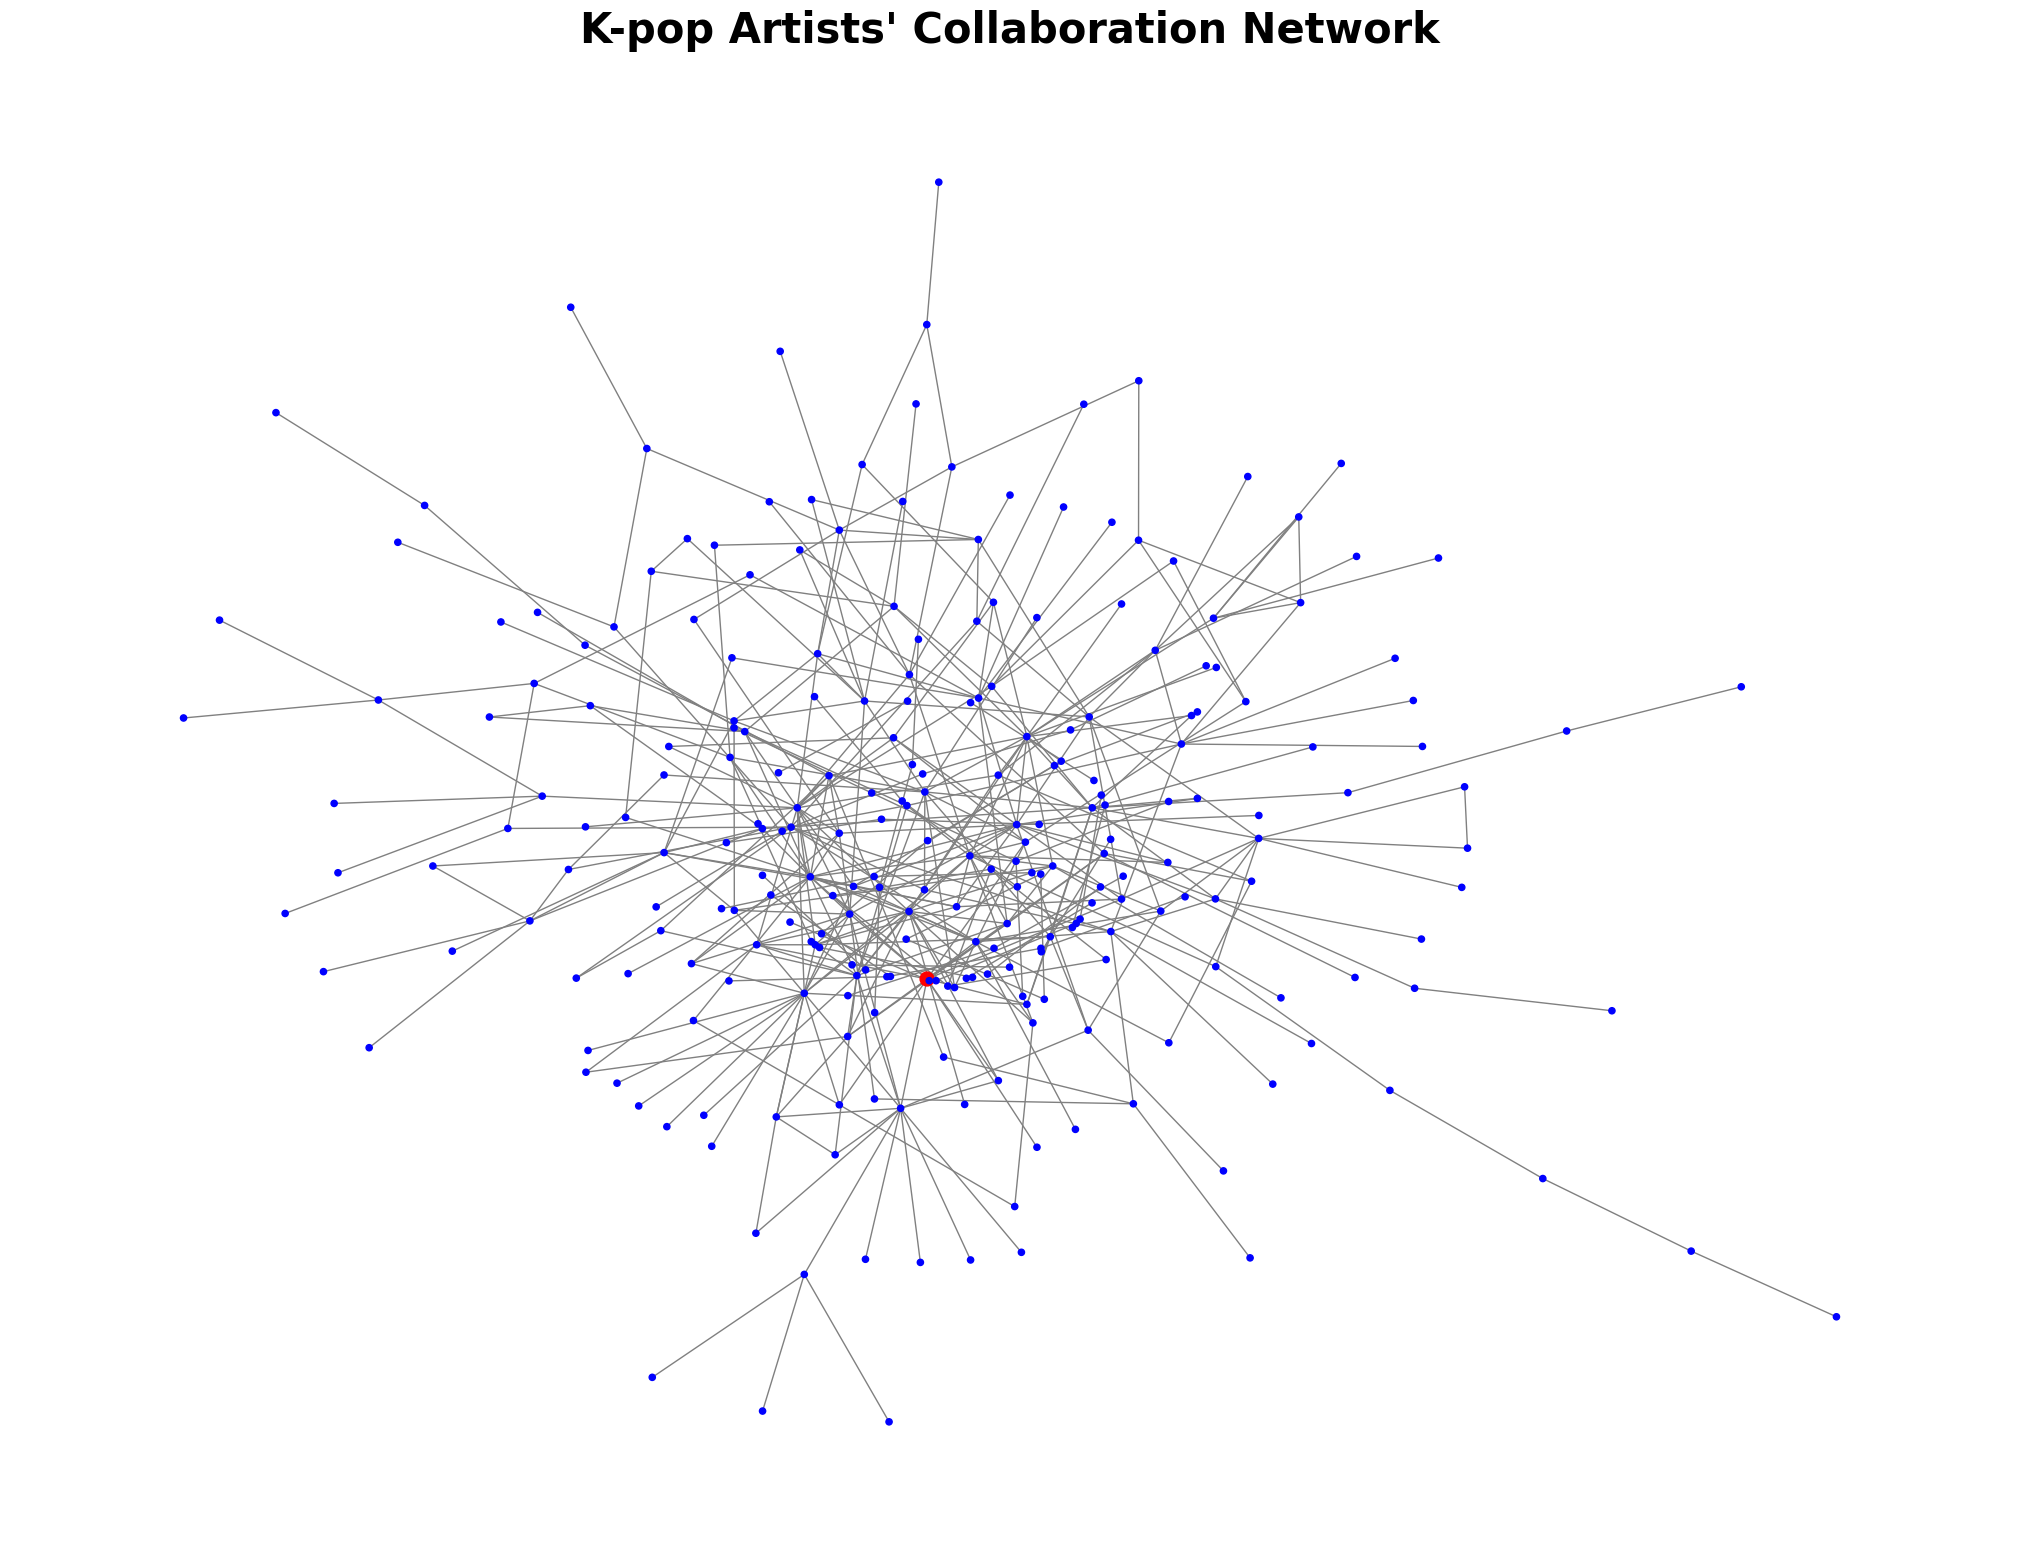

In [ ]:
# Visualize collaboration network among K-pop Artists only
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=False, node_size=nsizes, node_color=colors, edge_color='gray')
plt.title("K-pop Artists' Collaboration Network", fontsize=30, fontweight='bold')
plt.plot()

In [ ]:
# Filter nodes DataFrame based on whether "indian" is in "genres" column
df_nodes = nodes[nodes['genres'].apply(lambda x: 'hindi' in x)]
df_nodes.head()

,spotify_id,name,followers,popularity,genres,chart_hits
811,0lMa3YTHqQnDDTBaxAV7LK,Ranveer Singh,474708.0,51,"['desi hip hop', 'desi pop', 'filmi', 'hindi h...",['in (11)']
812,5UdFr0GeO7jKIaNIJgwB36,Raftaar,872426.0,61,"['desi hip hop', 'desi pop', 'desi trap', 'hin...",['in (5)']
1211,7uIbLdzzSEqnX0Pkrb56cR,Yo Yo Honey Singh,9404731.0,70,"['desi pop', 'filmi', 'hindi hip hop', 'modern...",['in (12)']
1381,4Ai0pGz6GhQavjzaRhPTvz,DIVINE,4435591.0,65,"['desi hip hop', 'desi pop', 'desi trap', 'hin...",['in (21)']
1552,7GmnD2XZleQw8PPzRJV7FY,Midival Punditz,144812.0,37,"['hindi indie', 'indian electronic', 'indian f...",['in (1)']


In [ ]:
# Filter nodes DataFrame based on whether "hindi" is in "genres" column
df_nodes = nodes[nodes['genres'].apply(lambda x: 'hindi' in x)]

# Extract spotify_ids of indian artists into a list
hindi_ids = list(df_nodes['spotify_id'])

# Filtering EdgeList DataFrame to include only edges between indian artists
df_edges = edges[edges['id_0'].isin(hindi_ids)]
df_edges = df_edges[df_edges['id_1'].isin(hindi_ids)]
df_edges.head()

,id_0,id_1
2206,5C1S9XwxMuuCciutwMhp5t,5UdFr0GeO7jKIaNIJgwB36
2666,4Ai0pGz6GhQavjzaRhPTvz,5C1S9XwxMuuCciutwMhp5t
9491,3nQ125TJobosBH446Dsvvv,4hGFNXuWut4b2sfJCJJNEo
11032,4Ai0pGz6GhQavjzaRhPTvz,5pJnHE4GkcnLYMvnMOmGZr
12581,0zcKJMI0E5YGHl7vIXPUPZ,4Ai0pGz6GhQavjzaRhPTvz


In [ ]:
# Filter nodes DataFrame based on whether "indian" is in "genres" column
df_nodes = nodes[nodes['genres'].apply(lambda x: 'indian' in x)]

# Extract spotify_ids and names into lists
hindi_ids = list(df_nodes['spotify_id'])
indian_names = list(df_nodes['name'])

# Filtering EdgeList DataFrame to include only edges between indian artists
df_edges = edges[edges['id_0'].isin(hindi_ids)]
df_edges = df_edges[edges['id_1'].isin(hindi_ids)]

# Add corresponding artist names (name0 for id_0; name1 for id_1) into EdgeList DataFrame
# This is the crucial step that was missing
df_edges['name0'] = df_edges['id_0'].apply(lambda x: indian_names[hindi_ids.index(x)])
df_edges['name1'] = df_edges['id_1'].apply(lambda x: indian_names[hindi_ids.index(x)])

# Represent EdgeList DataFrame as Graph using edges between name0 and name1)
import networkx as nx
G = nx.from_pandas_edgelist(df_edges, 'name0', 'name1')

<ipython-input-27-0e73ccf806fa>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_edges = df_edges[edges['id_1'].isin(hindi_ids)]


In [ ]:
# Only for Yo Yo Honey Singh, make the color "red", otherwise "blue"
colors = ['red' if node=='Yo Yo Honey Singh' else 'blue' for node in list(G.nodes())]
# Only for Yo Yo Honey Singh, make node_size = 100, otherwise node_size = 20
nsizes = [100 if node=='Yo Yo Honey Singh' else 20 for node in list(G.nodes())]

[]

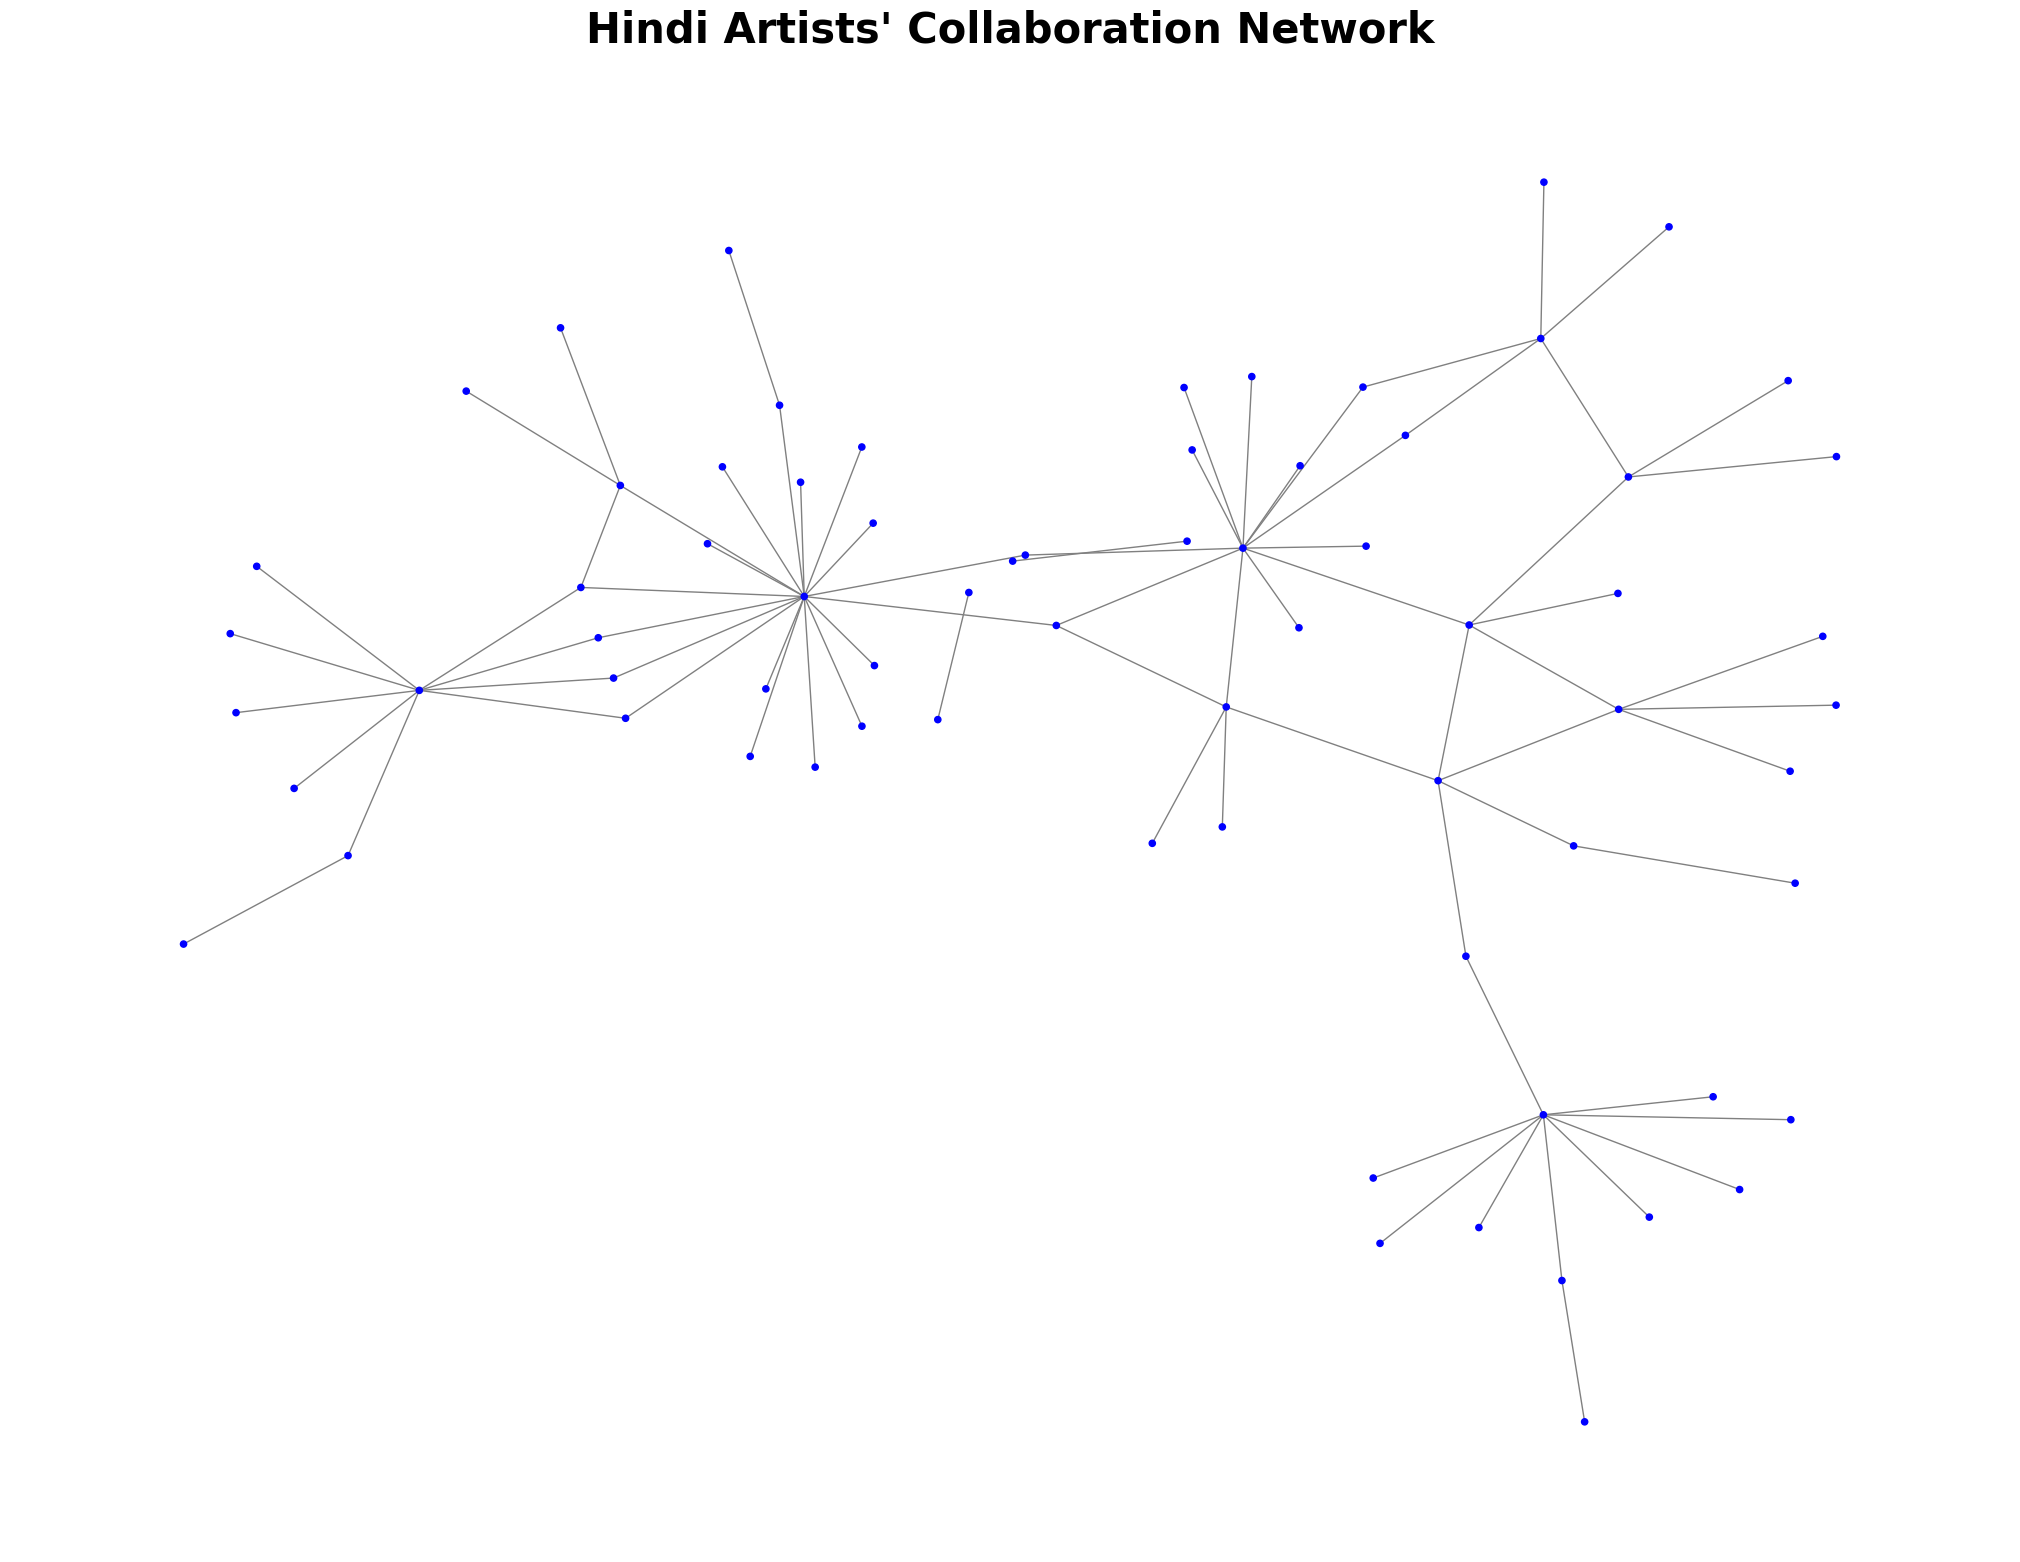

In [ ]:
# Visualize collaboration network among Hindi Artists only
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=False, node_size=nsizes, node_color=colors, edge_color='gray')
plt.title("Hindi Artists' Collaboration Network", fontsize=30, fontweight='bold')
plt.plot()